# PHAS0007 Computing Unit 3 Part 2: Plotting data

Authors: Louise Dash, Ben Waugh (b.waugh@ucl.ac.uk), Becky Chislett (rebecca.chislett@ucl.ac.uk)

Last updated: 2025-10-10

## Learning objectives

By the end of this session, you should be able to:
- plot functions using the Matplotlib library;
- read data from a file;
- plot data on a graph using the Matplotlib library;
- produce a plot in a suitable format for your lab book and formal report.

## Plotting data with Matplotlib

Using the Matplotlib library is a great way to explore and present your data. In this session we'll go through how to plot functions and data files, and how to best present the data. In the next unit we'll look at how to analyse data using least squares fits.

### Why not use Excel?

Once you get used to it, you'll find that Matplotlib is just as easy to use as Excel graphs, if not easier, especially when you need to include error bars or mathematical notation. Using it in a Jupyter notebook means you can use Python to analyse the data as well as displaying it. Moreover, the default plot produced by Matplotlib nearly always looks better than the default Excel plot.

### Importing

Before plotting anything, we need to import the `pyplot` module from Matplotlib. We'll also need to import NumPy, as before.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib can use different "backends" depending on how we want our plots to appear. Instead of the default static graphs we can create interactive ones by selecting the `ipympl` backend. We do this using the "magic" command `%matplotlib`. Magic commands are not part of the Python language but are provided to enable additional features in the Jupyter Notebook. In unit 2 we used one to measure the time taken to add all the elements of an array.

In [2]:
# Note that you can't add a trailing # comment on the same line as a %magic command
%matplotlib ipympl

# If you don't need the interactive features like zoom and pan simply omit this line,
# or comment it out.

You may see the alternative version `%matplotlib widget` used elsewhere. This does the same thing, but either way the package you need to install (if working on your own device) is called `ipympl`.

## Plotting functions

### Simple examples

We also need some data to plot. Even if we're plotting a function, we need to calculate that function at a discrete set of points. We'll use the `linspace` function to generate numbers for the x-values, and then calculate the corresponding y-values for a simple function, in this case $\sin(x)$.

In [3]:
x = np.linspace(0,2*np.pi,1001) # 1001 points (1000 intervals) between 0 and 2pi
y = np.sin(x)                   # N.B. NumPy trig functions use radians

Our plot will also need axis labels and a title.

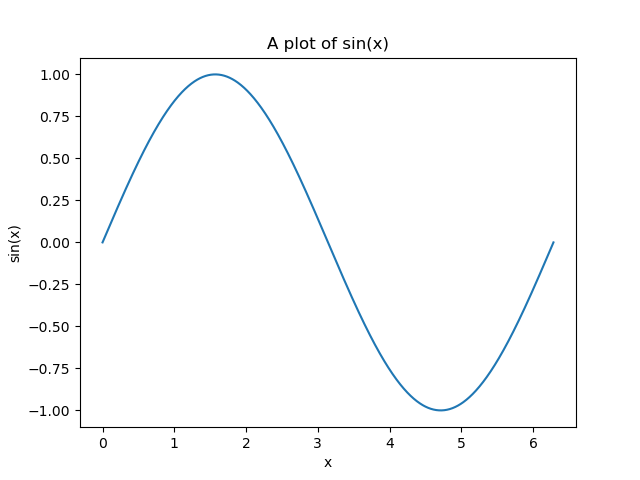

In [4]:
# Now for the plot itself
plt.figure()  # start a new figure
plt.plot(x,y) # plot the array "x" on the x axis and "y" on the y-axis
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("A plot of sin(x)"); # Semicolon ; on last line suppresses unwanted text output

The buttons on the left (as long as you are using `%matplotlib ipympl
`) allow you to interact with the plot by zooming in on an area of interest and/or panning the field of view.

Remember, this looks like a continuous function, but in reality it's a series of straight line segments between discrete points. Try zooming in, or reducing the number of points see the difference.

### A more complex example: plotting an ellipse

Here's a rather more complicated example, where we plot the parametric form of an ellipse, starting from three parameters: two vertices of the ellipse, and the eccentricity of the ellipse.

We'll start from the standard equation for an ellipse:
$$
\left(\frac{x}{a}\right)^2 + \left(\frac{y}{b}\right)^2 = 1,
$$
where $a$ and $b$ are the major and minor radii (or the semi-major and semi-minor axes), put it into the parametric form:
$$ x(t) = a \cos t, \\
y(t) = b \sin t, 
$$
and then rotate and translate the ellipse.

This is the code. Try changing the input parameters. You may find this useful some day!

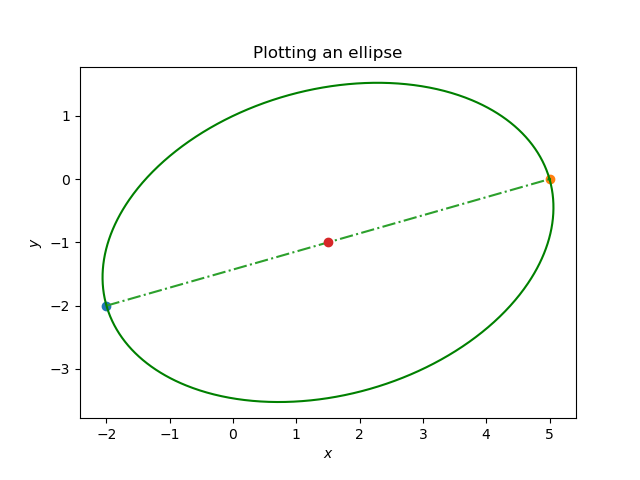

In [5]:
# The two vertices of the ellipse's major axis
x1, y1 = -2, -2
x2, y2 = 5, 0

# Eccentricity (0 <= ecc <= 1)
ecc = 0.75    # ecc = 0 gives a circle.

# Calculate major and minor radii (semi-major and semi-minor axes)
a = 0.5*np.sqrt((x2-x1)**2+(y2-y1)**2)
b = a*np.sqrt(1-ecc**2)

# Parametric equation for all values of 0 <= t <= 2*pi
t = np.linspace(0,2*np.pi,1001)
xx = a*np.cos(t)
yy = b*np.sin(t)

# Calculate rotation of ellipse
w = np.arctan2(y2-y1,x2-x1) # np.arctan2 chooses the correct quadrant, cf np.arctan
# Translate and rotate X and Y to calculate the points of the ellipse
x = (x1+x2)/2 + xx*np.cos(w) - yy*np.sin(w)
y = (y1+y2)/2 + xx*np.sin(w) + yy*np.cos(w)

# Plot the ellipse
plt.figure()
plt.axes(aspect='equal')           # force aspect ratio of the plot to be 1:1
                                   # ('equal' can be changed to a number)
plt.plot(x1,y1, "o")               # first vertex
plt.plot(x2,y2, "o")               # second vertex
plt.plot([x1,x2],[y1,y2], "-.")    # major axis: note how start/end points given in [],
                                   # x points then y points
plt.plot((x2+x1)/2,(y2+y1)/2, "o") # centre point of ellipse
plt.plot(x,y,'g-')                 # the ellipse itself.
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Plotting an ellipse");

## Presentation

###  Plotting two or more lines together

Sometimes we may want to plot two or more lines together on the same graph. To do this, we just add a new plot command for the new line. When you have more than one line, you'll generally need a legend as well. Look at this code to see how to do this:

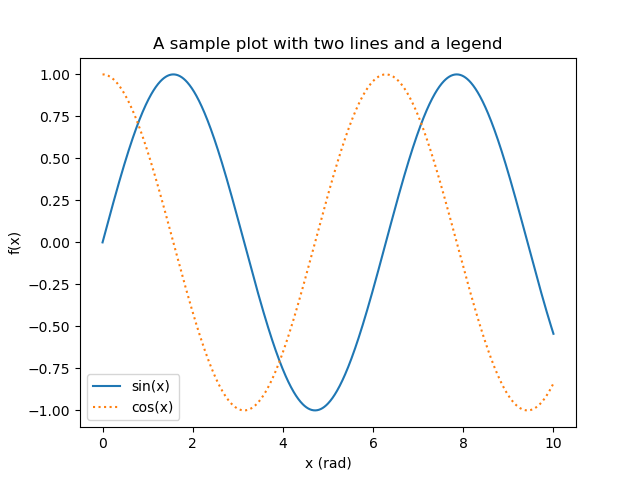

In [6]:
x = np.linspace(0,10,1001)
y1 = np.sin(x)
y2 = np.cos(x)

plt.figure()                       # start a new figure
plt.plot(x,y1,label="sin(x)")      # use default line, no points, and set the label
plt.plot(x,y2,':',label="cos(x)")  # use a dotted line for the second function 
plt.xlabel('x (rad)')              # put a label on the x axis, including units
plt.ylabel('f(x)')                 # put a label on the y axis
plt.title('A sample plot with two lines and a legend') # a title for the plot
plt.legend(loc="best");  # this will try and guess the best location for the legend...
# ...or try "lower left, center right, etc. For example:
#plt.legend(loc="upper right")

Note that Matplotlib will by default use different colours for the two curves. You can control the colour and style of the line, and the marker if any to use for each point, by passing a third argument to the `plot` function. In the example above we have used `:` for the second function

    plt.plot(x,y2,':',label="cos(x)")

to use a dotted line. Many more options are described in [the documentation for the `plot` function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

### Customising the style of your plots

You may find that you want to change the whole visual style of your plots, and there are a wide variety of styles you can choose from. Running the following cell will list all available styles, which you can preview at the matplotlib [style sheets reference page](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

In [7]:
print(plt.style.available) # list of all available styles

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Which you choose will depend on several factors, including where you intend to use the plot (e.g. viewing on a screen, projected on a wall, or printed on a page) as well as personal preference. 

For example, the cell below sets the style to `seaborn-v0_8-colorblind` for this and all subsequent plots, and then plots the same data as the cell above. This style is a particularly useful alternative to the default because, as its name suggests, it uses a palette that is distinguishable to those with the most common forms of colour blindness.

N.B. if you experiment with these styles, you will probably want to restart the kernel and re-run the code in the notebook to ensure the settings are consistent.

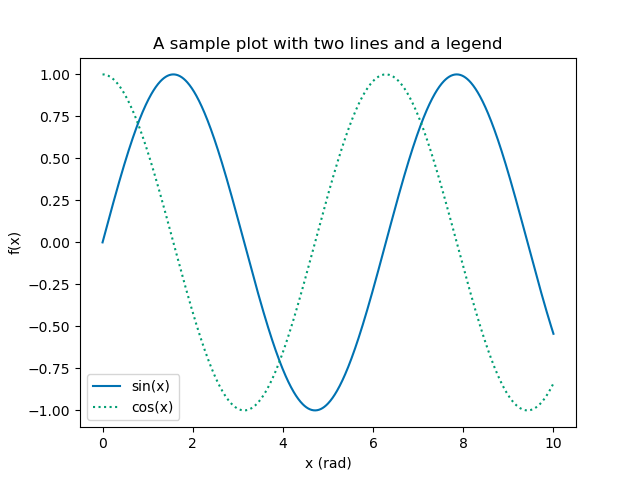

In [8]:
plt.style.use('seaborn-v0_8-colorblind') # change style to make plots accessible for colour-blind users
plt.figure()                       # start a new figure
plt.plot(x,y1,label="sin(x)")      # default line style, no points, and set the label
plt.plot(x,y2,':',label="cos(x)")  # dotted line for second function 
plt.xlabel('x (rad)')              # put a label on the x axis, including units
plt.ylabel('f(x)')                 # put a label on the y axis
plt.title('A sample plot with two lines and a legend') # a title for the plot
plt.legend(loc="best");  # this will try and guess the best location for the legend...

## Plotting data on a graph

### Getting the data

Usually we'll want to plot some data we already have, e.g. from a lab experiment. We'll need a way to get this data into a plottable format, i.e. arrays like the ones we created for x and y above. There are a few ways to do this.

- Entering the data by hand straight into Python, using the `np.array()` function. This is generally inefficient and you won't want to do this.
- Entering the data into another source and then loading it into Python:
    - You can use Excel, and then save the Excel file as a .csv (Comma Separated Values) file, which is a plain text format. This is a good choice if you want to do some data manipulation before analysing it.
    - You can use a text editor like Notepad or the inbuilt Jupyter Notebook text file editor to enter the data, and save it as a .txt file. Useful if you only have a few data points and don't want to fire up the full force of Excel.
    
### Reading data from a file

There are several ways to read data from a file in Python, but as we are using NumPy anyway we will use the `np.loadtxt()` function, which is relatively simple and general. The following command will load the data from the file called `samplefile.txt` and put it in an array called `data`:

In [9]:
data = np.loadtxt("samplefile.txt")

Of course, this will only work if you actually have a file called `samplefile.txt` in the same directory as your notebook! Otherwise you'll just end up with an error message, like you probably did above. In this case, download the file called `samplefile.txt` from Moodle and retry it.

In [10]:
print(f"data = {data}")

data = [ 0.    2.5   4.6   8.6  10.34 15.42]


If that worked, you should see that the array `data` contains the same numbers as the file `samplefile.txt`: make sure by looking at the file itself. To view the file you can either:

- click on the filename in the Jupyter Notebook directory browser tab; or
- open the .txt file in a text editor (e.g. Wordpad on Windows).

By default, the `loadtxt` function will store all the numbers as floating-point values. If the data are guaranteed to be integers then you can use the `dtype` argument to tell `loadtxt` the type of values to use. 

In [11]:
data2 = np.loadtxt("samplefile2.txt", dtype=int)
print(f"integer data = {data2}")

integer data = [ 2  5  3  0 -1]


Rather than a single list of values, we often have data in the form of a table, with columns for x and y values and possibly errors. For example, look at the text file `S4_sampledata.txt`, which was created in Notepad. It contains three columns of data, separated by tabs, which represent the x-values (in this case voltage), the y-values (in this case current) , and the error in the y-values.

Make sure you've downloaded this file from Moodle, and put it in the same directory as this notebook. Open the file in the Jupyter text editor (click on the file in the directory listing tab) or Notepad. You will be able to see that the data file has several header lines. These are ignored by `np.loadtxt` as they are commented out with `#` characters, but these header lines nonetheless include important information about where the data comes from, what each column represents, and what units are used.

We can still use `np.loadtxt()` function, but now we need to "unpack" the data into three separate arrays, like this:

In [12]:
xdata, ydata, yerror = np.loadtxt("S4_sampledata.txt", unpack=True) 
print("x values: ", xdata)
print("y values: ", ydata)
print("errors on y-values: ", yerror)

x values:  [ 0. 10. 20. 30. 40. 50. 60. 70. 80.]
y values:  [ 0.  11.3 20.4 28.7 39.8 50.7 59.5 71.2 80.5]
errors on y-values:  [5. 5. 5. 5. 5. 5. 5. 5. 5.]


See the [full documentation for `np.loadtxt()`](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) to find out how to ignore rows with header information, change the delimiter from tab to comma, or pick which columns you want to load. By default, lines starting with the comment `#` character are ignored, so it's useful to use this for column headers.

### Specifying the plot style

When we're plotting data, we usually want to plot it as points rather than as a line. By default, Matplotlib will plot a line, but it's easy to plot points instead. You can specify the style of the data points using a short abbreviation, in this example small points (`'.'`). Note that this is enclosed in quotation marks.

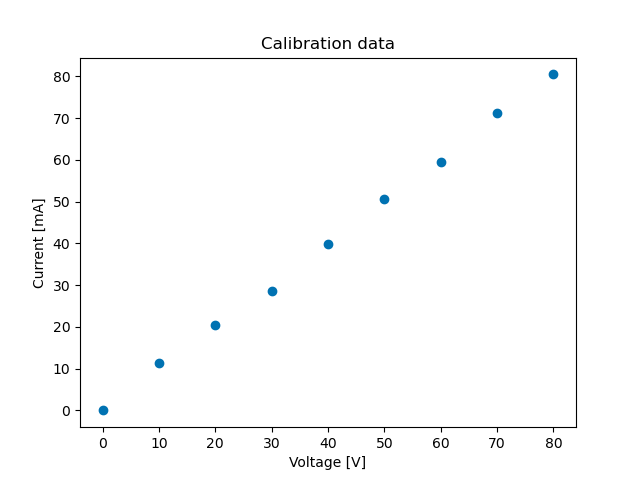

In [13]:
# Figure with title and axis labels
plt.figure()
plt.title('Calibration data')
plt.xlabel('Voltage [V]')
plt.ylabel('Current [mA]')

# Plot current vs voltage
plt.plot(xdata,ydata, 'o' );

The abbreviations for the marker styles are reasonably intuitive, so they're fairly easy to remember:

* `'.'`	point
* `'o'`	circle
* `'v'`	triangle_down
* `'*'`	star
* `'+'`	plus
* `'x'`	cross

Similarly, there are various line styles available. We have already used one of these when plotting functions.

* `'-'`	solid
* `':'`	dotted
* `'--'` dashed
* `'-.'` dash-dot

There's a full list of the possibilities in [the documentation for the `plot` function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

It's also possible to specify colours manually (and you can see how to do this in the link above) but in general it is recommended to stick to one of the pre-define styles and accept the default colours.

### How to plot error bars

We didn't include any error bars in the plot above. To include these we need to use the `errorbar()` command **instead of** the `plot()` command. (This is not necessarily intuitive, as you might think you would use the `errorbar()` **and** `plot()` commands together.) 

Note how we do this:-
* We specify the x and y data as before.
* The vertical error bars are specified with the `yerr` keyword. (Hopefully you can deduce what to do if you want horizontal error bars.)
* We use the `fmt` argument to specify the point style (here circles). If you leave this out, the default is to draw a straight line between the datapoints, and in general you don't want this.

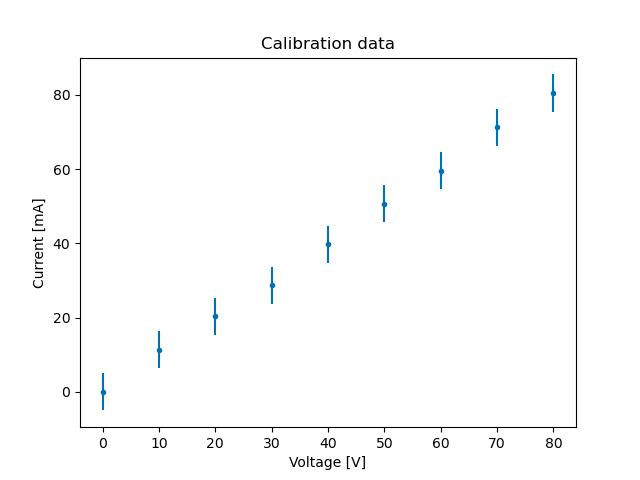

In [14]:
# Figure with title and axis labels
plt.figure()
plt.title('Calibration data')
plt.xlabel('Voltage [V]')
plt.ylabel('Current [mA]')

# Plot current (with errors) vs voltage
plt.errorbar(xdata,ydata,yerr=yerror,fmt='.');

By default the Matplotlib doesn't include "caps" at the ends of the errorbars, if you want them you have to specify the size:-

In [15]:
# if we don't include 
#   plt.figure() 
# here we will update the last figure rather than generating
# a new one - sometimes useful!
# You'll need to scroll back up to the last figure to see the effect of this.

plt.errorbar(xdata,ydata,yerr=yerror,capsize=5,fmt='o'); # capsize sets length of caps in points

To see how we can combine these, we'll:
* add a straight line $y=x$ through the datapoints (we'll come on to how to *fit* a line through the data next session);
* specify the range for the x and y axes;
* add all the other things our plot needs (labels, titles, legends, gridlines, etc.).

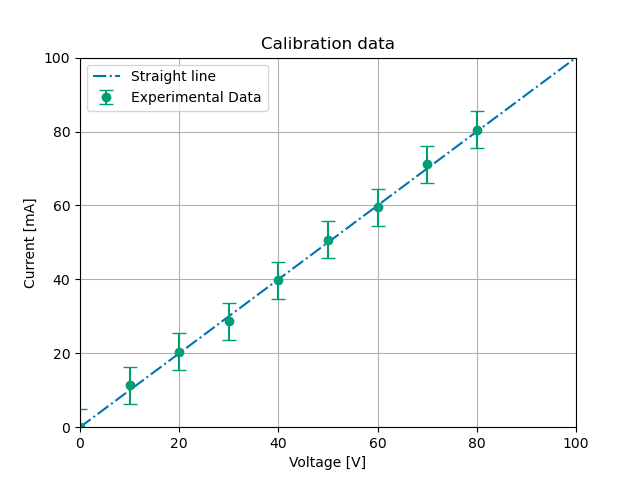

In [16]:
# Figure with title and axis labels
plt.figure()
plt.title('Calibration data')
plt.xlabel('Voltage [V]')
plt.ylabel('Current [mA]')

# Straight line y=x
xline = np.linspace(0,100,2) # only need two points for a straight line
yline = xline                # y = x
plt.plot(xline,yline, '-.', label='Straight line')

# Plot data with circles and errorbars
plt.errorbar(xdata,ydata,yerr=yerror,capsize=5,fmt='o',label='Experimental Data') 

# Legend, grid, axis ranges
plt.legend(loc='best');
plt.grid(True)
plt.xlim(0,100)
plt.ylim(0,100)

# Outputting to a file: see the section below
plt.savefig('p01_data.png') # saves to a PNG file
#plt.savefig('p01_data.png', dpi=300) # saves to a PNG file with a higher resolution
#plt.savefig('p01_data.pdf') # saves to a PDF file

###  Outputting your plot to a file

You can use the disk icon (if using interactive plots) to open up the plot as a PNG image in a new tab, which you can then save.

You can also use the `savefig()` function to save your plot to a file for printing or including in another document (eg. Word), which gives you more control over the way the plot image is produced. The full documentation for this is here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig

Note that you need to put the `savefig()` command in the same cell as the other plot commands if you're using a Jupyter Notebook. Some sample commands are in the cell above, commented out: try uncommenting each of them in turn to see the results. The files will be saved in the same folder as your Jupyter Notebook.

You can save in a number of formats, but generally you'll want to save as either a .png or .pdf file. The file type can be autodetermined from the filename extension, as in these examples. You'll probably also find that all the default settings work OK, but if you want to change the resolution of a png (for better quality), try changing the dpi (dots per inch) setting, as above.

## Preparing plots for your lab book or formal report

When you're using this in lab classes, remember there are specific rules and guidelines for how your plots should look, depending on whether you're preparing your plot to stick into your lab book or for part of a formal report. Full guidelines are given in Section 7 of the Data Analysis and Statistics Booklet but here is a basic checklist to help you make sure you haven't forgotten anything.

* Axes are labelled, complete with units.
* Grid is present (use `plt.grid(True)`) where this makes the data easier to decipher.
* Error bars are included if appropriate. If you don't include error bars because they'd be smaller than the data symbols, say so in the caption.
* Legend is included if there is more than one dataset on the same plot, and is positioned so that it doesn't cover up important data.
* All components are an appropriate size for the printed graph or report. You may need to change the figure or font sizes.
* Appropriate line and point styles so that the data is clearly legible when it's printed or included in the report. If you are printing the plot in black and white, don't rely on different colours to distinguish between datasets.
* A title is useful when looking at the electronic version of the plot, but don't include it for a formal report: instead use a figure caption within the document. In your lab book you will need a handwritten caption, and you can crop any title off the final printout with scissors before sticking it in.

## Further information

You can see lots more examples from Matplotlib in Chapter 3 of *Learning Scientific Programming with Python* by Christian Hill, although please use 

     import numpy as np
     import matplotlib.pyplot as plt

and [not "import pylab"](http://carreau.github.io/posts/10-No-PyLab-Thanks/).

There is a lot of information out there for those who are interested in plotting beyond the scope of what we cover in PHAS0007:-

- There are lots of impressive Matplotlib examples available: for some spectacular ones take a look at IPython/Jupyter developer Matthias Bussonnier's page: [Viridisify](https://matthiasbussonnier.com/posts/24-Viridisify/).
- You can also use Matplotlib in an object-oriented way, Chapter 7 of *Learning Scientific Programming with Python* has very comprehensive coverage of this.
- You may want to also have a look at the [Matplotlib tutorial](https://www.python-course.eu/matplotlib.php) at [python-course.eu](https://python-course.eu) which has some very good examples of how to lay out subplots etc.
- For those of you interested in data visualisation, and in particular more on what Seaborn can do, try [Data Visualization with Python and Seaborn — Part 3: Color Palettes](https://medium.com/@neuralnets/data-visualization-with-python-and-seaborn-part-3-69647c19bf2) and [Seaborn is actually quite good for data visualization](https://towardsdatascience.com/matplotlib-seaborn-basics-2bd7b66dbee2) for starters.